<a href="https://colab.research.google.com/github/heejae-yoon/Facebook-Marketing-Strategy-Optimization/blob/main/Code_for_Sentiment_Analysis_by_Dept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
data = pd.read_csv('Theater_Prof.csv')

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora, models
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
comments = data['comments'].astype(str)

In [ ]:
# Function for text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

# Apply the preprocessing function
processed_texts = comments.apply(preprocess_text)

# Prepare a list of texts for further processing
texts = [text.split() for text in processed_texts]

In [ ]:
texts = [text.split() for text in processed_texts]

In [ ]:
processed_texts = comments.apply(preprocess_text)
print(processed_texts)

0      prof. margo sweet kind help whatever , class e...
1      's nicest professor met usc . extremely inspir...
2                                      best . queen ge .
3      danc 280 ge supposed . basically free . flexib...
4      loved class ! 're worried strictly dance , rea...
                             ...                        
107                                    best acting class
108       serously useful professor theatre department .
109    wonderful professor really know stuff . worked...
110    important class take usc school theatre . lear...
111    want serious actor , teacher . excellent ! blu...
Name: comments, Length: 112, dtype: object


In [ ]:
texts = [text.split() for text in processed_texts]
print(texts[:5])

[['prof.', 'margo', 'sweet', 'kind', 'help', 'whatever', ',', 'class', 'engaging', 'easy', 'ge', 'assignment', 'well', '-', 'paper', 'take', 'home', 'exam', 'basically', '.', 'give', 'new', 'perspective', 'life', 'dance', 'honestly', 'recommend', '!', '!'], ["'s", 'nicest', 'professor', 'met', 'usc', '.', 'extremely', 'inspirational', 'extremely', 'motivating', '.', 'pushed', 'u', 'best', '!', 'class', 'presentation', 'extremely', 'fun', '!', 'extremely', 'lenient', 'grader', '.'], ['best', '.', 'queen', 'ge', '.'], ['danc', '280', 'ge', 'supposed', '.', 'basically', 'free', '.', 'flexible', 'regarding', 'deadline', 'write', 'whatever', 'topic', 'like', 'essay', '.', "n't", 'scared', 'grading', 'rubric', '.', 'great', 'ge', ',', 'stressless', '.'], ['loved', 'class', '!', "'re", 'worried', 'strictly', 'dance', ',', 'really', 'emphasized', 'fitness', 'aspect', 'class', 'talk', 'thing', 'genuinely', 'enjoy', 'passionate', 'come', 'fitness', '.', 'emphasized', 'making', 'class', 'stress-f

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(processed_texts)

##The overall sentiment of department (Average sentiment across reviews)

In [ ]:
sentiments = processed_texts.apply(lambda x: TextBlob(x).sentiment.polarity)
sentiments

0      0.476199
1      0.450000
2      1.000000
3      0.600000
4      0.356250
         ...   
107    0.500000
108    0.300000
109    0.525000
110    0.300000
111    0.223810
Name: comments, Length: 112, dtype: float64

In [ ]:
sentiments_df = sentiments.to_frame(name='Sentiment Score')
sentiments_df.reset_index(inplace=True)  # Converts the index into a regular column
sentiments_df.rename(columns={'index': 'Comment Index'}, inplace=True)  # Renames the column to clearly indicate what it represents
sentiments_df.head()  # Displays the first few rows for inspection

,Comment Index,Sentiment Score
0,0,0.476199
1,1,0.450000
2,2,1.000000
3,3,0.600000
4,4,0.356250


In [ ]:
average_sentiment_score = sentiments_df['Sentiment Score'].mean()
print(average_sentiment_score)

0.1586418012540063


##Offline classes are more interactive and extensive compared to online classes by department

In [ ]:
# process the null value as "No" to represent the offline course
data['Online Class'] = data['Online Class'].fillna('No')
# Calculate the average mood of an online course
online_class_sentiment = sentiments_df[data['Online Class'].str.strip() == 'Yes']['Sentiment Score'].mean()
# Calculate the average mood of an offline course
offline_class_sentiment = sentiments_df[data['Online Class'].str.strip() == 'No']['Sentiment Score'].mean()


print(f"Average sentiment for online classes: {online_class_sentiment}")
print(f"Average sentiment for offline classes: {offline_class_sentiment}")

Average sentiment for online classes: 0.12544642857142854
Average sentiment for offline classes: 0.1592453534845986


##Sentiments changed during covid by department——theater

In [ ]:
import pandas as pd

sentiments_df['post_date'] = data['post_date']

# Convert post_date as a date object
sentiments_df['post_date'] = pd.to_datetime(sentiments_df['post_date'], format='%b %dth, %Y', errors='coerce')
sentiments_df['post_date'] = sentiments_df['post_date'].fillna(pd.to_datetime(sentiments_df['post_date'], format='%b %dst, %Y', errors='coerce'))
sentiments_df['post_date'] = sentiments_df['post_date'].fillna(pd.to_datetime(sentiments_df['post_date'], format='%b %dnd, %Y', errors='coerce'))
sentiments_df['post_date'] = sentiments_df['post_date'].fillna(pd.to_datetime(sentiments_df['post_date'], format='%b %drd, %Y', errors='coerce'))

# Set COVID-19 starting date
covid_start_date = pd.Timestamp('2020-03-01')

# Mark whether comments were made before or after COVID-19
sentiments_df['During Covid'] = sentiments_df['post_date'] >= covid_start_date

# The average score of sentiment before and after COVID-19
pre_covid_avg_sentiment = sentiments_df[sentiments_df['post_date'] < covid_start_date]['Sentiment Score'].mean()
during_covid_avg_sentiment = sentiments_df[sentiments_df['post_date'] >= covid_start_date]['Sentiment Score'].mean()

print(f"Average sentiment before Covid: {pre_covid_avg_sentiment}")
print(f"Average sentiment during Covid: {during_covid_avg_sentiment}")


Average sentiment before Covid: 0.18052544186866668
Average sentiment during Covid: 0.1575423468314093


##Visualization--Word Cloud

In [ ]:
# Access the column containing text data
comment_column = 'comments'
comments = data[comment_column].tolist()
comments= ' '.join(map(str, comments))

# Print text data
print(comments)

Prof. Margo is very sweet and kind and helps you with whatever, the classes are not the most engaging but VERY EASY GE A if you do all the assignments well - a few papers and take home exams basically. Gives you a new perspective to life and dance honestly so I recommend!! She's the nicest professor I have met at USC. She was extremely inspirational and extremely motivating. She pushed us to do our best! All the class presentations were extremely fun! Extremely lenient grader. BEST. Queen of GE. Her DANC 280 is what GE A is supposed to be. Basically free A. Very flexible regarding deadlines and you can write whatever topic you like for essays. Don't be scared by her grading rubrics. Great GE, so stressless. I loved this class! If you're worried about it being strictly about dance, she really emphasized the fitness aspect of the class so you talk about things you genuinely enjoy and are passionate about when it comes to fitness. She emphasized making this a class that was stress-free an

In [ ]:
# Convert text to lowercase
comments = comments.lower()
print(comments)

prof. margo is very sweet and kind and helps you with whatever, the classes are not the most engaging but very easy ge a if you do all the assignments well - a few papers and take home exams basically. gives you a new perspective to life and dance honestly so i recommend!! she's the nicest professor i have met at usc. she was extremely inspirational and extremely motivating. she pushed us to do our best! all the class presentations were extremely fun! extremely lenient grader. best. queen of ge. her danc 280 is what ge a is supposed to be. basically free a. very flexible regarding deadlines and you can write whatever topic you like for essays. don't be scared by her grading rubrics. great ge, so stressless. i loved this class! if you're worried about it being strictly about dance, she really emphasized the fitness aspect of the class so you talk about things you genuinely enjoy and are passionate about when it comes to fitness. she emphasized making this a class that was stress-free an

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the lowercase text
tokens = word_tokenize(comments)
print(tokens)

['prof.', 'margo', 'is', 'very', 'sweet', 'and', 'kind', 'and', 'helps', 'you', 'with', 'whatever', ',', 'the', 'classes', 'are', 'not', 'the', 'most', 'engaging', 'but', 'very', 'easy', 'ge', 'a', 'if', 'you', 'do', 'all', 'the', 'assignments', 'well', '-', 'a', 'few', 'papers', 'and', 'take', 'home', 'exams', 'basically', '.', 'gives', 'you', 'a', 'new', 'perspective', 'to', 'life', 'and', 'dance', 'honestly', 'so', 'i', 'recommend', '!', '!', 'she', "'s", 'the', 'nicest', 'professor', 'i', 'have', 'met', 'at', 'usc', '.', 'she', 'was', 'extremely', 'inspirational', 'and', 'extremely', 'motivating', '.', 'she', 'pushed', 'us', 'to', 'do', 'our', 'best', '!', 'all', 'the', 'class', 'presentations', 'were', 'extremely', 'fun', '!', 'extremely', 'lenient', 'grader', '.', 'best', '.', 'queen', 'of', 'ge', '.', 'her', 'danc', '280', 'is', 'what', 'ge', 'a', 'is', 'supposed', 'to', 'be', '.', 'basically', 'free', 'a.', 'very', 'flexible', 'regarding', 'deadlines', 'and', 'you', 'can', 'wri

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Filter out stopwords from the tokens
filtered_tokens = [word for word in tokens if word not in stop_words]
print(filtered_tokens)

['prof.', 'margo', 'sweet', 'kind', 'helps', 'whatever', ',', 'classes', 'engaging', 'easy', 'ge', 'assignments', 'well', '-', 'papers', 'take', 'home', 'exams', 'basically', '.', 'gives', 'new', 'perspective', 'life', 'dance', 'honestly', 'recommend', '!', '!', "'s", 'nicest', 'professor', 'met', 'usc', '.', 'extremely', 'inspirational', 'extremely', 'motivating', '.', 'pushed', 'us', 'best', '!', 'class', 'presentations', 'extremely', 'fun', '!', 'extremely', 'lenient', 'grader', '.', 'best', '.', 'queen', 'ge', '.', 'danc', '280', 'ge', 'supposed', '.', 'basically', 'free', 'a.', 'flexible', 'regarding', 'deadlines', 'write', 'whatever', 'topic', 'like', 'essays', '.', "n't", 'scared', 'grading', 'rubrics', '.', 'great', 'ge', ',', 'stressless', '.', 'loved', 'class', '!', "'re", 'worried', 'strictly', 'dance', ',', 'really', 'emphasized', 'fitness', 'aspect', 'class', 'talk', 'things', 'genuinely', 'enjoy', 'passionate', 'comes', 'fitness', '.', 'emphasized', 'making', 'class', 'st

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.probability import FreqDist

# Calculate frequency distribution of words
freq_dist = FreqDist(filtered_tokens)
print(freq_dist)

<FreqDist with 1131 samples and 3762 outcomes>


In [ ]:
from nltk.util import ngrams

# Generate bigrams
bigrams = list(ngrams(filtered_tokens, 2))
print(bigrams)

[('prof.', 'margo'), ('margo', 'sweet'), ('sweet', 'kind'), ('kind', 'helps'), ('helps', 'whatever'), ('whatever', ','), (',', 'classes'), ('classes', 'engaging'), ('engaging', 'easy'), ('easy', 'ge'), ('ge', 'assignments'), ('assignments', 'well'), ('well', '-'), ('-', 'papers'), ('papers', 'take'), ('take', 'home'), ('home', 'exams'), ('exams', 'basically'), ('basically', '.'), ('.', 'gives'), ('gives', 'new'), ('new', 'perspective'), ('perspective', 'life'), ('life', 'dance'), ('dance', 'honestly'), ('honestly', 'recommend'), ('recommend', '!'), ('!', '!'), ('!', "'s"), ("'s", 'nicest'), ('nicest', 'professor'), ('professor', 'met'), ('met', 'usc'), ('usc', '.'), ('.', 'extremely'), ('extremely', 'inspirational'), ('inspirational', 'extremely'), ('extremely', 'motivating'), ('motivating', '.'), ('.', 'pushed'), ('pushed', 'us'), ('us', 'best'), ('best', '!'), ('!', 'class'), ('class', 'presentations'), ('presentations', 'extremely'), ('extremely', 'fun'), ('fun', '!'), ('!', 'extrem

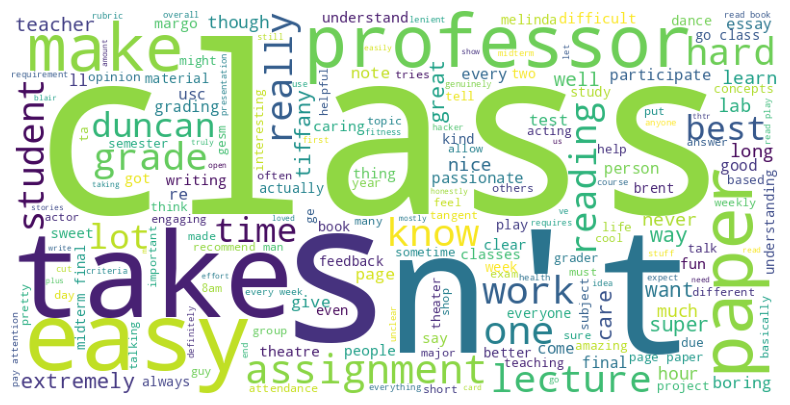

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(filtered_tokens))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##Semantics Analysis

In [ ]:
from gensim import corpora, models
from nltk.tokenize import RegexpTokenizer

# Preprocess
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

# Preprocessing application
data['Processed Comments'] = data['comments'].apply(preprocess)

# Build dictionary
dictionary = corpora.Dictionary(data['Processed Comments'])

# Build corpus
corpus = [dictionary.doc2bow(text) for text in data['Processed Comments']]

# Train LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10, random_state=42)

# Show topic
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.031*"class" + 0.020*"easy" + 0.015*"paper" + 0.012*"grade" + 0.011*"assignment"')
(1, '0.037*"class" + 0.015*"paper" + 0.012*"take" + 0.010*"work" + 0.009*"lot"')
(2, '0.044*"class" + 0.015*"professor" + 0.012*"reading" + 0.012*"best" + 0.010*"tiffany"')
(3, '0.017*"class" + 0.016*"hard" + 0.014*"take" + 0.013*"get" + 0.013*"note"')
(4, '0.021*"class" + 0.016*"make" + 0.012*"know" + 0.012*"lecture" + 0.011*"take"')


In [ ]:
!pip install pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the visualized data
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the output
pyLDAvis.display(vis_data)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.0 MB/s eta 0:00:00
